In [189]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf

In [190]:
# matplotlib Setting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [191]:
tickers = [
    'AAPL', # 애플
    'AMT', # 아메리칸 타워
    'AMZN', # 아마존닷컴
    'CMG', # 치포틀레 멕시칸 그릴
    'EQIX', # 에퀴닉스
    'MSFT', # 마이크로 소프트
    'SCHD', # SCHWAB US DIVIDEND EQU
    'UNH', # 유나이티드헬스 그룹
    'VOO' # VANGUARD S&P 500 ETF
]

In [192]:
startDate = '2018-01-01'
ohlc = yf.download(tickers,
                      start = startDate)
prices = ohlc["Adj Close"].dropna(how="all")

[*********************100%***********************]  9 of 9 completed


In [193]:
df = prices[prices.index >= startDate]
df

,AAPL,AMT,AMZN,CMG,EQIX,MSFT,SCHD,UNH,VOO
Date,,,,,,,,,
2018-01-02,41.018421,129.106735,59.450500,292.950012,409.846558,81.168488,44.413776,206.187851,228.318741
2018-01-03,41.011288,129.609848,60.209999,309.000000,411.735626,81.546249,44.543564,208.350830,229.677094
2018-01-04,41.201778,127.716225,60.479500,307.109985,410.791107,82.263962,44.759888,209.255157,230.684280
2018-01-05,41.670872,128.539551,61.457001,313.790009,412.203308,83.283913,45.036762,213.245407,232.162750
2018-01-08,41.516098,129.911774,62.343498,318.470001,420.190826,83.368881,45.131939,209.544159,232.643250
...,...,...,...,...,...,...,...,...,...
2022-09-12,163.429993,265.089996,136.449997,1747.939941,665.469971,266.649994,74.570000,531.250000,377.859985
2022-09-13,153.839996,254.630005,126.820000,1701.060059,636.270020,251.990005,71.699997,513.960022,361.380005
2022-09-14,155.309998,251.820007,128.550003,1721.489990,626.679993,252.220001,71.760002,509.769989,362.730011


In [194]:
daily_ret = df.pct_change()  # 종목 수정 종가데이터의 일별주가상승률
annual_ret = daily_ret.mean() * 252 # 연평균 주가상승률
daily_cov = daily_ret.cov() # 일별주가상승률의 공분산행렬
annual_cov = daily_cov * 252 # 공분산행렬과 영업일 수의 곱

port_ret = [] # 포트폴리오의 일별주가상승률
port_risk = [] # 리스크
port_weights = [] # 비중
sharpe_ratio = []

In [195]:
for _ in tqdm(range(900000)): # 임의로 만들 포트폴리오
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights) # 임의의 가중치를 랜덤으로 부여

    returns = np.dot(weights, annual_ret) # 가중치와 연 수익률 행렬과 내적을 실시
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) # 포트폴리오의 변동성의 기댓값을 산출

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

100%|██████████| 900000/900000 [00:32<00:00, 28003.10it/s]


In [196]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(tqdm(tickers)):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in tickers]]
df

100%|██████████| 9/9 [00:01<00:00,  6.35it/s]


,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,SCHD,UNH,VOO
0,0.246297,0.246332,0.999855,0.166459,0.221953,0.325655,0.088550,0.009937,0.045403,0.015348,0.086066,0.040628
1,0.210822,0.227427,0.926990,0.010244,0.059446,0.263883,0.105710,0.177408,0.071433,0.181498,0.088345,0.042032
2,0.215099,0.225965,0.951910,0.149645,0.084131,0.160932,0.071946,0.102029,0.066991,0.174066,0.059057,0.131203
3,0.217964,0.229774,0.948600,0.127683,0.164408,0.060473,0.016300,0.109423,0.184304,0.080104,0.156606,0.100699
4,0.214040,0.227614,0.940365,0.020536,0.268705,0.079340,0.085951,0.189651,0.097654,0.019253,0.165065,0.073845
...,...,...,...,...,...,...,...,...,...,...,...,...
899995,0.213766,0.226088,0.945502,0.083790,0.114323,0.189271,0.057811,0.182445,0.027276,0.100882,0.205392,0.038809
899996,0.268529,0.233874,1.148174,0.195301,0.020404,0.029006,0.175953,0.046635,0.126018,0.202620,0.196787,0.007276
899997,0.226124,0.219135,1.031896,0.007410,0.167837,0.069191,0.196757,0.106604,0.079008,0.193212,0.076798,0.103182
899998,0.194286,0.233915,0.830583,0.145051,0.101834,0.155487,0.037520,0.306517,0.023713,0.022051,0.021650,0.186176


In [197]:
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # Low RisK
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # Max Sharpe

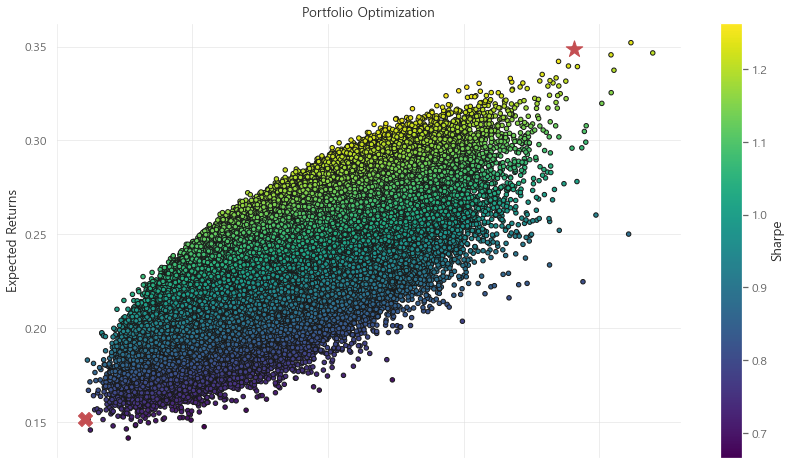

In [198]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
                edgecolors='k', grid=True)
# 샤프지수가 가장 큰 포트폴리오
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r',
            marker='*', s=300)
# 리스크가 제일 작은 포트폴리오
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r',
            marker='X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [199]:
min_risk

,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,SCHD,UNH,VOO
74787,0.151825,0.204138,0.743734,0.041446,0.105136,0.041495,0.0042,0.123504,0.020804,0.439468,0.051557,0.172389


In [200]:
max_sharpe

,Returns,Risk,Sharpe,AAPL,AMT,AMZN,CMG,EQIX,MSFT,SCHD,UNH,VOO
519661,0.348916,0.276173,1.263397,0.258544,0.051051,0.023633,0.440789,0.002775,0.118733,0.057568,0.040777,0.006131


In [201]:
max_sharpe.to_excel('max_sharpe.xlsx')

In [202]:
stock_weight_dict = dict(zip(list(max_sharpe[tickers].columns),
                             max_sharpe[tickers].values.flatten().tolist()))
stock_weight_dict

{'AAPL': 0.2585435035566139,
 'AMT': 0.05105124263258271,
 'AMZN': 0.023632550649730917,
 'CMG': 0.4407889391293809,
 'EQIX': 0.0027746502266246657,
 'MSFT': 0.11873251876382046,
 'SCHD': 0.05756774083585264,
 'UNH': 0.04077748680115802,
 'VOO': 0.006131367404235647}

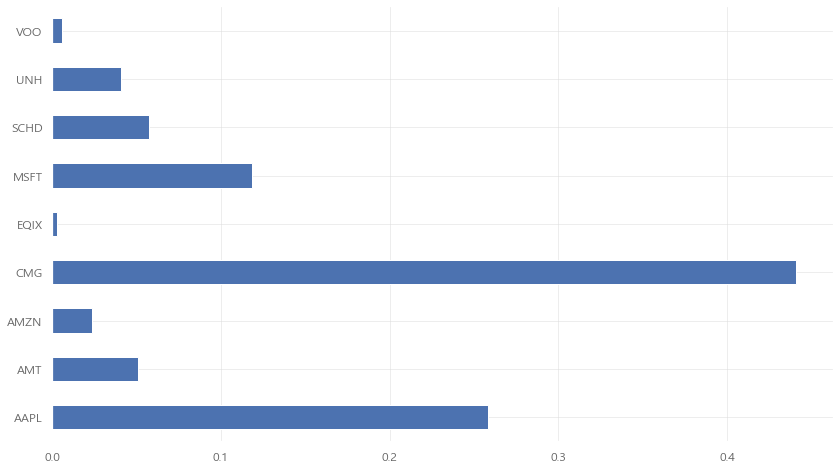

In [203]:
from collections import OrderedDict

weights = OrderedDict(stock_weight_dict)
pd.Series(weights).plot.barh();

In [204]:
def print_orderdict(dict, postfix='%', space=8, title='', line=1):
    print(title)
    idx = 0
    for i in dict:
        idx += 1
        if postfix=='%':
            num = str(round(dict[i]*100, 2))
        else:
            num = str(dict[i])
        print(i.ljust(6), (num+postfix).rjust(space), end="")
        if idx % line == 0:
            print()

In [205]:
from pypfopt.discrete_allocation import DiscreteAllocation

deposit = 20000

latest_prices = prices.iloc[-1] # 마지막 종가 기준

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=deposit)
allocation, leftover = da.lp_portfolio()

buy = 0
for k  in allocation:
    buy += latest_prices[k] * allocation[k]

print("Total Asset($): ", deposit)
print("Total buy($): ", round(buy, 2), ", leftover($):", round(deposit - buy, 2))
print_orderdict(allocation,
                postfix=" stk",
                title="** Optimal Weights **")

Total Asset($):  20000
Total buy($):  19697.81 , leftover($): 302.19
** Optimal Weights **
AAPL     34 stk
AMT       4 stk
AMZN      4 stk
CMG       5 stk
MSFT     10 stk
SCHD     16 stk
UNH       2 stk


C:\Users\Sun Lee\AppData\Roaming\Python\Python39\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
